# EDA
## A ideia é: EDA gera hipóteses → Modelagem aplica as decisões.

In [1]:
# === 01 • Imports e carga dos dados tratados ===
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PROCESSED = "../data/processed/listings_model_baseline.csv"

df = pd.read_csv(DATA_PROCESSED)
print(f"Shape: {df.shape}")
df.head(3)


Shape: (10743, 17)


,latitude,longitude,room_type,property_type,accommodates,bedrooms,bathrooms,beds,number_of_reviews,reviews_per_month,review_scores_rating,minimum_nights,maximum_nights,availability_365,instant_bookable,host_is_superhost,price
0,43.77709,11.25216,Private room,Private room in serviced apartment,2,1.0,1.0,1.0,156.0,0.85,4.67,1,99,345,1.0,NaN,130.0
1,43.76832,11.24348,Entire home/apt,Entire condo,4,2.0,2.0,3.0,40.0,0.22,4.77,6,31,162,0.0,0.0,112.0
2,43.76742,11.24378,Entire home/apt,Entire rental unit,4,2.0,1.0,2.0,34.0,0.19,4.48,4,1124,171,0.0,1.0,97.0


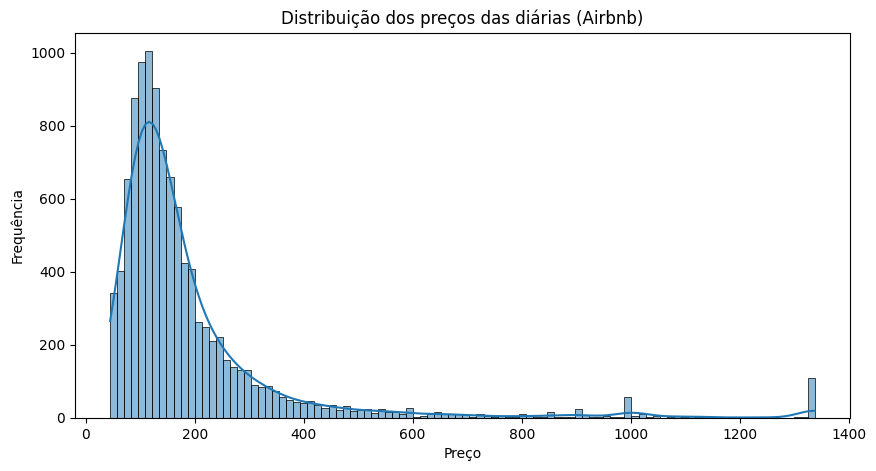

In [2]:
# === 02 • Distribuição dos preços ===
plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=100, kde=True)
plt.title("Distribuição dos preços das diárias (Airbnb)")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()


In [3]:
# === 03 • Estatísticas descritivas ===
df["price"].describe(percentiles=[.05,.25,.5,.75,.95])


count    10743.000000
mean       194.148487
std        189.600516
min         45.000000
5%          64.000000
25%        102.000000
50%        139.000000
75%        205.000000
95%        500.000000
max       1337.400000
Name: price, dtype: float64

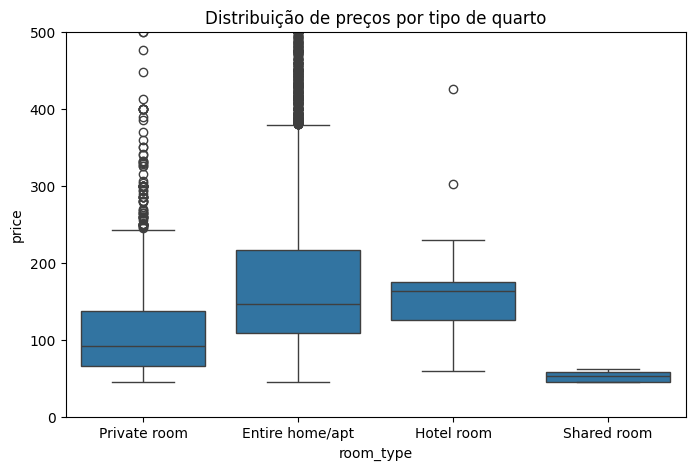

In [4]:
# === 04 • Preço por tipo de quarto ===
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="room_type", y="price")
plt.ylim(0, 500)  # limitar para ver melhor a mediana
plt.title("Distribuição de preços por tipo de quarto")
plt.show()


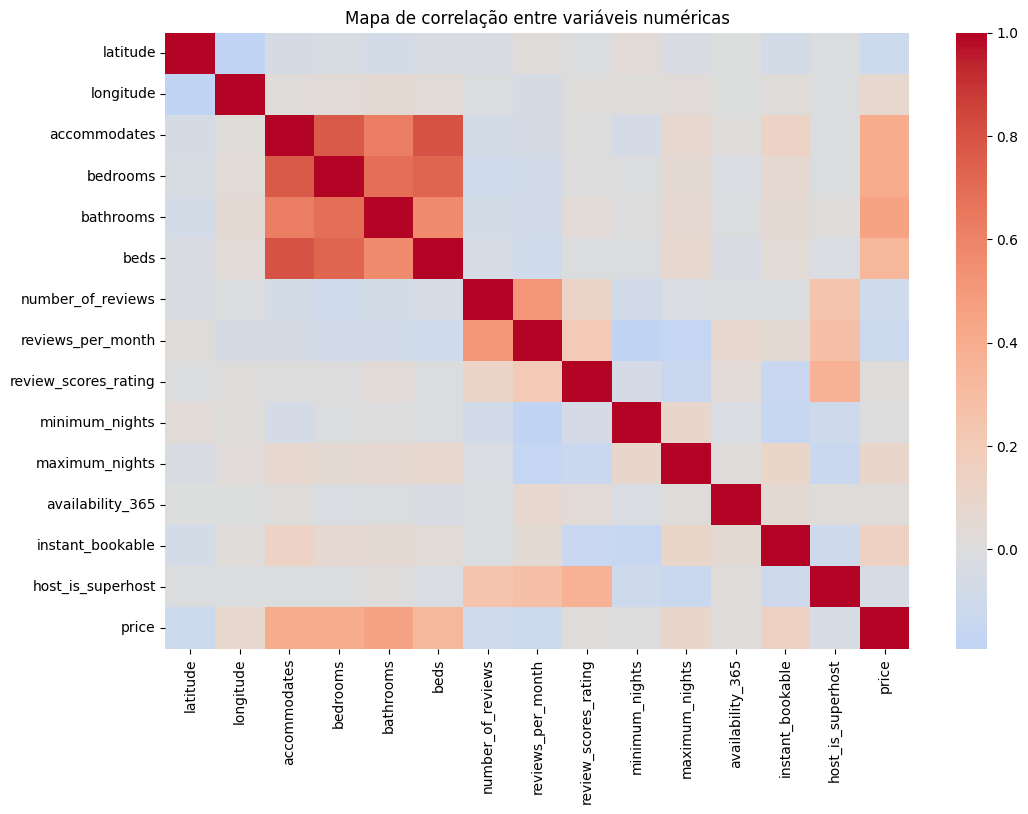

In [5]:
# === 05 • Correlação entre variáveis numéricas ===
num_cols = df.select_dtypes(include=["float64","int64"]).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Mapa de correlação entre variáveis numéricas")
plt.show()


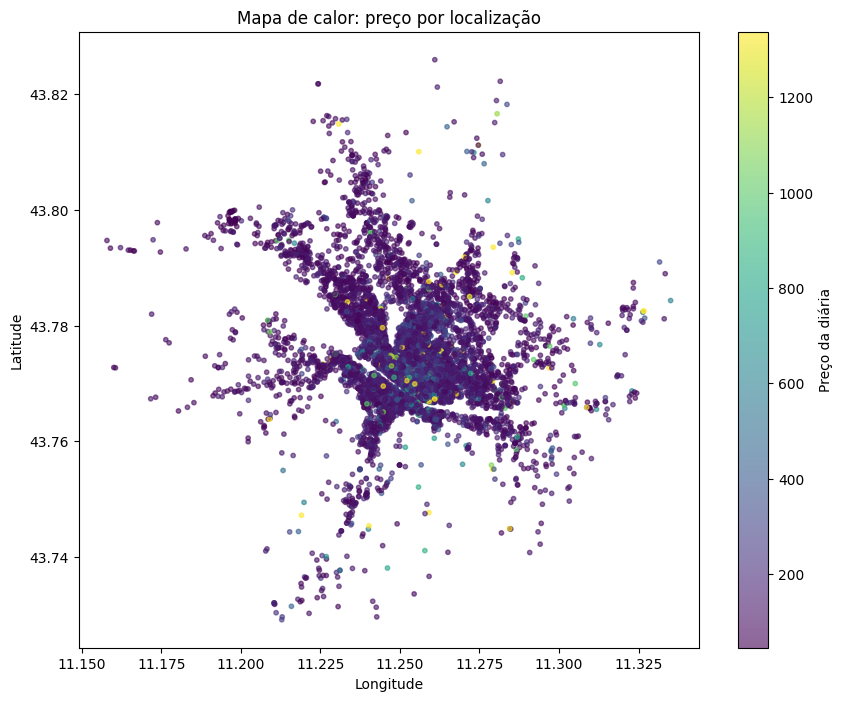

In [6]:
# === 06 • Mapa de calor: Preço x Localização ===
plt.figure(figsize=(10,8))
sc = plt.scatter(
    df["longitude"], df["latitude"],
    c=df["price"], cmap="viridis", alpha=0.6, s=10
)
plt.colorbar(sc, label="Preço da diária")
plt.title("Mapa de calor: preço por localização")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
